### Project Title - Manufacturing Quality Control with Control Charts

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate 60 days of defect data
np.random.seed(42)
days = pd.date_range(start='2024-01-01', periods=60)
sample_size = np.random.randint(80, 120, size=60)  # daily sample sizes
true_defect_rate = 0.05

# Simulate daily defect counts
defect_count = np.random.binomial(sample_size, true_defect_rate)

df = pd.DataFrame({
    'Date': days,
    'Sample_Size': sample_size,
    'Defects': defect_count
})

df['Defect_Rate'] = df['Defects'] / df['Sample_Size']
print(df.head())

        Date  Sample_Size  Defects  Defect_Rate
0 2024-01-01          118        5     0.042373
1 2024-01-02          108        9     0.083333
2 2024-01-03           94        6     0.063830
3 2024-01-04           87        3     0.034483
4 2024-01-05          100        5     0.050000


In [3]:
print (df)

         Date  Sample_Size  Defects  Defect_Rate
0  2024-01-01          118        5     0.042373
1  2024-01-02          108        9     0.083333
2  2024-01-03           94        6     0.063830
3  2024-01-04           87        3     0.034483
4  2024-01-05          100        5     0.050000
5  2024-01-06          118        6     0.050847
6  2024-01-07           98        9     0.091837
7  2024-01-08          102        7     0.068627
8  2024-01-09           90        6     0.066667
9  2024-01-10           90        5     0.055556
10 2024-01-11          103        5     0.048544
11 2024-01-12          115       10     0.086957
12 2024-01-13          119        6     0.050420
13 2024-01-14          103        4     0.038835
14 2024-01-15           82        3     0.036585
15 2024-01-16          101        3     0.029703
16 2024-01-17           81        0     0.000000
17 2024-01-18          103        5     0.048544
18 2024-01-19          109        5     0.045872
19 2024-01-20       

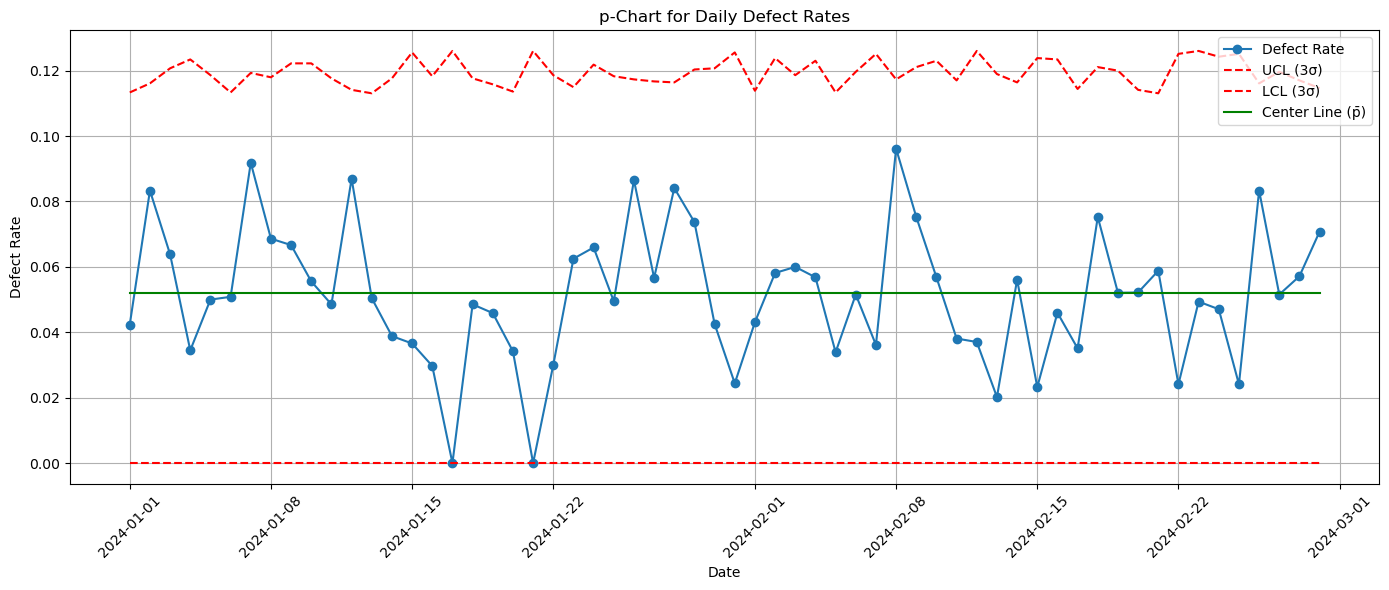

In [14]:
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Defect_Rate'], marker='o', label='Defect Rate')
plt.plot(df['Date'], df['UCL'], linestyle='--', color='red', label='UCL (3σ)')
plt.plot(df['Date'], df['LCL'], linestyle='--', color='red', label='LCL (3σ)')
plt.plot(df['Date'], df['p_bar'], linestyle='-', color='green', label='Center Line (p̄)')
plt.title('p-Chart for Daily Defect Rates')
plt.xlabel('Date')
plt.ylabel('Defect Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
# Overall average defect rate (p̄)
p_bar = df['Defects'].sum() / df['Sample_Size'].sum()

# Control limits (3σ)
df['p_bar'] = p_bar
df['UCL'] = p_bar + 3 * np.sqrt((p_bar * (1 - p_bar)) / df['Sample_Size'])
df['LCL'] = p_bar - 3 * np.sqrt((p_bar * (1 - p_bar)) / df['Sample_Size'])
df['LCL'] = df['LCL'].clip(lower=0)  # LCL can't be negative

In [9]:
print(df)

         Date  Sample_Size  Defects  Defect_Rate     p_bar       UCL  LCL
0  2024-01-01          118        5     0.042373  0.052011  0.113336  0.0
1  2024-01-02          108        9     0.083333  0.052011  0.116112  0.0
2  2024-01-03           94        6     0.063830  0.052011  0.120720  0.0
3  2024-01-04           87        3     0.034483  0.052011  0.123430  0.0
4  2024-01-05          100        5     0.050000  0.052011  0.118626  0.0
5  2024-01-06          118        6     0.050847  0.052011  0.113336  0.0
6  2024-01-07           98        9     0.091837  0.052011  0.119303  0.0
7  2024-01-08          102        7     0.068627  0.052011  0.117970  0.0
8  2024-01-09           90        6     0.066667  0.052011  0.122230  0.0
9  2024-01-10           90        5     0.055556  0.052011  0.122230  0.0
10 2024-01-11          103        5     0.048544  0.052011  0.117649  0.0
11 2024-01-12          115       10     0.086957  0.052011  0.114130  0.0
12 2024-01-13          119        6   

<function matplotlib.pyplot.show(close=None, block=None)>

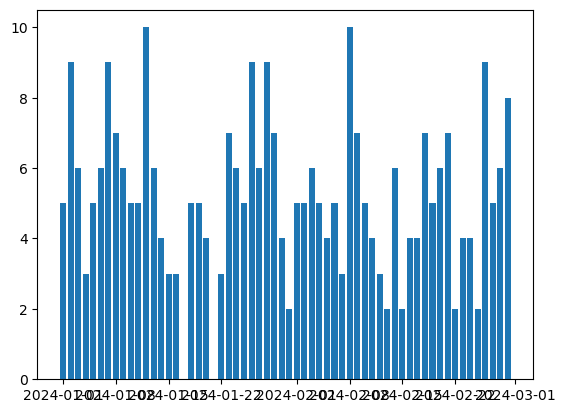

In [13]:
c=plt.bar(df['Date'], df['Defects'])
plt.show